In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,Time Block,Time Stamp,Outside State (MW),Typical Day (MW)
0,1,00:00:00,1891.29,4300
1,2,00:15:00,1798.89,4200
2,3,00:30:00,1830.73,4125
3,4,00:45:00,1905.34,4000
4,5,01:00:00,1945.35,3875


In [ ]:
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

In [4]:
df.set_index('Time Stamp',inplace= True)

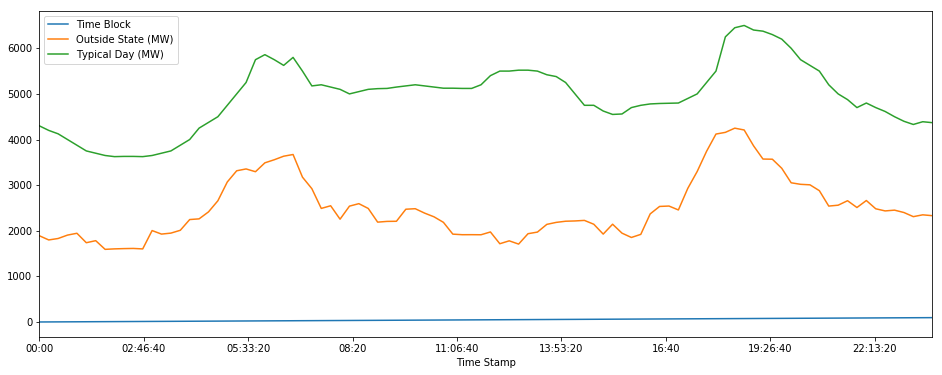

In [5]:
df.plot(figsize = (16,6))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 00:00:00 to 23:45:00
Data columns (total 3 columns):
Time Block            96 non-null int64
Outside State (MW)    96 non-null float64
Typical Day (MW)      96 non-null int64
dtypes: float64(1), int64(2)
memory usage: 3.0+ KB


In [7]:
# Total consumption =  Instate production + Power Met from National grid
# Instate production = 50.07*1000
# Power met from national grid = df['Outside State'].sum()
# Typical_curve_area = df['Typical day'].sum()
# Adjusted_curve =  (Total_consumption_in_a_day(Mwh)/Typical_curve_area) * National_Grid

In [20]:
#converting instate production into MW
In_state = 50.7*1000
#Total consumption in a state
Total_consumption = 109.44*1000
National_grid_sum = (df['Outside State (MW)'].sum())/4
#Total_consumption = In_state + National_grid_sum
Typical_curve_area = (df['Typical Day (MW)'].sum())/4

In [29]:
50.07*1000

50070.0

In [26]:
df['Adjusted_curve'] =  (Total_consumption/Typical_curve_area)*df['Typical Day (MW)']

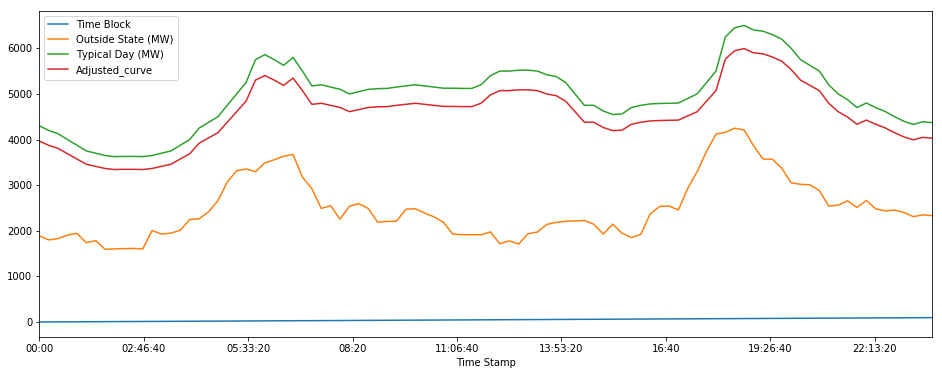

In [27]:
df.plot(figsize=(16,6))

In [ ]:
ng = df['Outside State (MW)']
in_state = np.zeros(96)
adjusted = df['Adjusted_curve']
def objective(in_state):
    for i in range(0,96):
        return(((ng[i]+in_state[i])-adjusted[i])^2).sum())
    
##defining the constariants

def constraint1(x):
    return 3559 -  NG[12] - x[12]
    
        

def constraint2(x):
    return 6101 - NG[76] - x[76]


def constraint3(x):
    state_prod = 0
    for i in range(96):
        state_prod = state_prod + x[i]
    return (50070.0 - state_prod)/4


def constraint4(x):
    total_power = 0
    for i in range(96):
        total_power = total_power + x[i] + NG[i]
    return (109947.55 - total_power)/4 



In [ ]:
import numpy as np
adjusted = df_day_1['adjusted_values']
adjusted = np.array(adjusted)

NG = df_day_1['National_Grid_day2']
NG = np.array(NG)

x0 = NG